In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from datetime import datetime

In [10]:
df = pd.read_csv('AMZN.csv')

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5965

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.50803720e-04, 8.93653381e-05, 8.37798446e-05, 6.42313847e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267001e-05, 5.02679068e-05,
       3.63046846e-05, 2.93229456e-05, 2.79267001e-05, 3.07194468e-05,
       2.23414624e-05, 5.58549343e-06, 3.90974313e-05, 6.98166224e-05,
       7.81946069e-05, 5.02679068e-05, 3.90974313e-05, 5.58534002e-05,
       5.02679068e-05, 4.74754157e-05, 2.93229456e-05, 3.07194468e-05,
       3.07194468e-05, 3.49084390e-05, 2.79267001e-05, 3.07194468e-05,
       3.07194468e-05, 3.07194468e-05, 2.51339534e-05, 3.90974313e-05,
       3.21156923e-05, 5.16644080e-05, 1.38236744e-04, 1.61974452e-04,
       2.42961549e-04, 2.48547043e-04, 3.12778172e-04, 2.40169058e-04,
       1.98279136e-04, 2.79266234e-04, 2.51339534e-04, 2.20620343e-04,
       2.03864374e-04, 2.10846113e-04, 1.98279136e-04, 2.40169058e-04,
       2.31791074e-04, 2.23413089e-04, 2.48547043e-04, 2.90436965e-04,
       2.82058981e-04, 2.68095503e-04, 2.73680996e-04, 2.45754296e-04,
     

In [12]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [13]:
model = tf.keras.models.load_model("./basiclstm.h5")

In [14]:


test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

72.37312357544295

C:\Users\Hufal\AppData\Local\Temp/ipykernel_12936/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


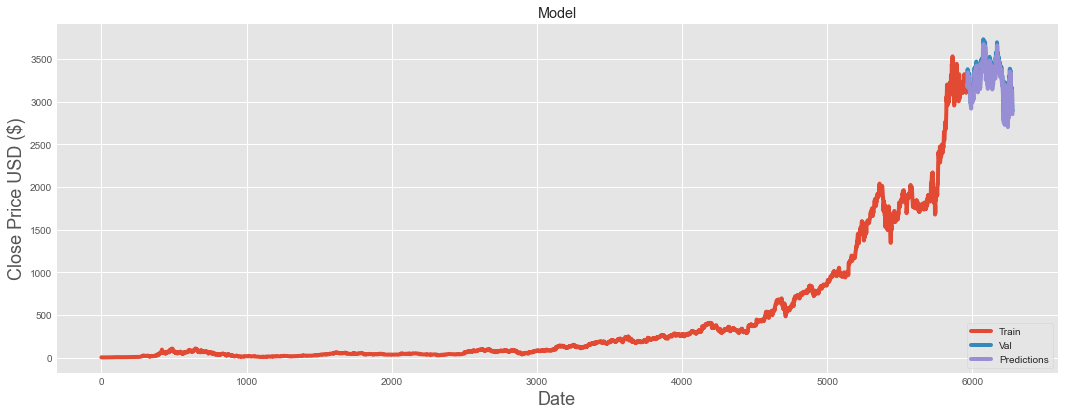

In [15]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [16]:
from tensorflow import keras
yActual = y_test
yPredicted = predictions
 
mapeObject = keras.losses.MeanAbsolutePercentageError()
mapeTensor = mapeObject(yActual, yPredicted)
mape = mapeTensor.numpy()
 
print(mape)

1.7354559
